# **Лабораторная №4. Классификация**



## **1. Загрузка данных**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1. Считывание данных**

In [4]:
df = pd.read_csv('lab4_5.csv')
df.drop_duplicates()

,X1,X2,Class
0,-1.115138,0.738108,DOWN
1,-1.836181,1.041943,DOWN
2,-0.771741,0.248164,DOWN
3,-2.500027,1.273076,DOWN
4,-0.291992,0.117160,DOWN
...,...,...,...
195,0.530659,0.433447,UP
196,-0.431016,-0.217685,UP
197,2.277442,1.168651,UP
198,0.238321,0.162325,UP


### **1.2. Диаграмма рассеяния**

<Axes: title={'center': 'Диаграмма рассеяния'}, xlabel='X1', ylabel='X2'>

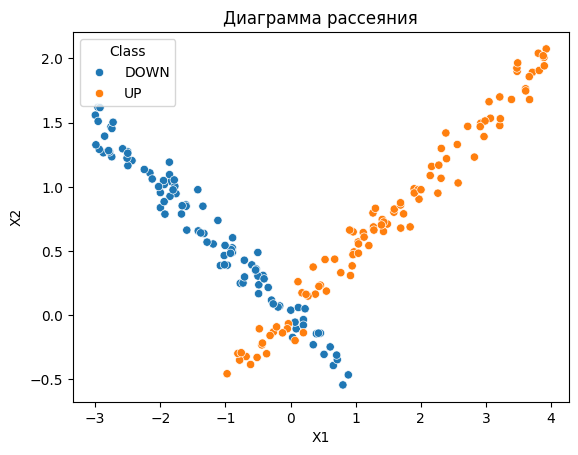

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Диаграмма рассеяния')
sns.scatterplot(df, x='X1', y='X2', hue='Class', ax=ax)

### **1.3. Оценка сбалансированности классов**

In [6]:
df.groupby('Class').count()

,X1,X2
Class,,
DOWN,100,100
UP,100,100


### **1.4. Предобработка данных**

In [7]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Class'] = label_enc.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df[['Class']]

###  **1.5. Разбиение на тестовую и обучающую выборки**

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=23,
                                                    stratify=y)

<Axes: title={'center': 'Разделение на тестовую и обучающую выборки'}, xlabel='X1', ylabel='X2'>

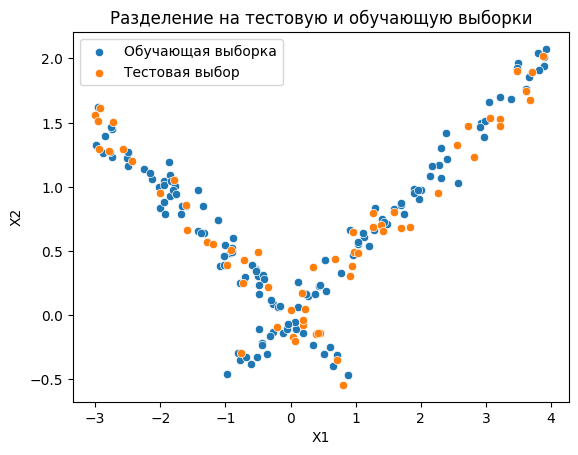

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Разделение на тестовую и обучающую выборки')
sns.scatterplot(X_train, x='X1', y='X2', ax=ax, label='Обучающая выборка')
sns.scatterplot(X_test, x='X1', y='X2', ax=ax, label='Тестовая выбор')

<Axes: title={'center': 'Разделение на тестовую и обучающую выборки (Классы)'}, xlabel='Class', ylabel='count'>

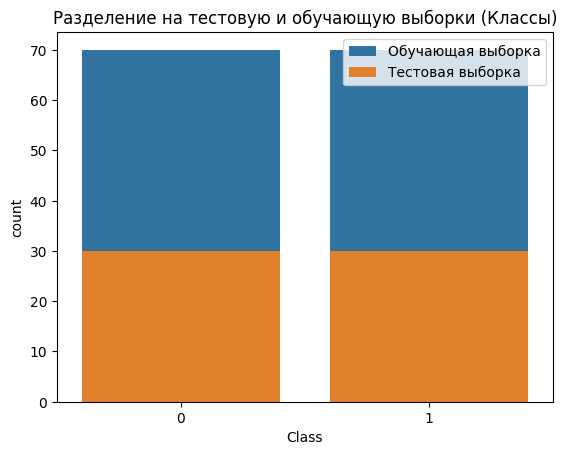

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Разделение на тестовую и обучающую выборки (Классы)')
sns.countplot(y_train, x='Class', ax=ax, label='Обучающая выборка')
sns.countplot(y_test, x='Class', ax=ax, label='Тестовая выборка')

## **2. kNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### **2.1. Классификация**

In [12]:
accuracies_uniform = []
accuracies_distance = []
neighbors = range(1, 21)

for i in neighbors:
  knn = KNeighborsClassifier(i, weights = 'uniform')
  knn.fit(X_train, y_train['Class'].ravel())
  y_test_pred = knn.predict(X_test).reshape(-1, 1)
  accuracies_uniform.append(accuracy_score(y_test, y_test_pred))

  knn = KNeighborsClassifier(i, weights = 'distance')
  knn.fit(X_train, y_train['Class'].ravel())
  y_test_pred = knn.predict(X_test).reshape(-1, 1)
  accuracies_distance.append(accuracy_score(y_test, y_test_pred))

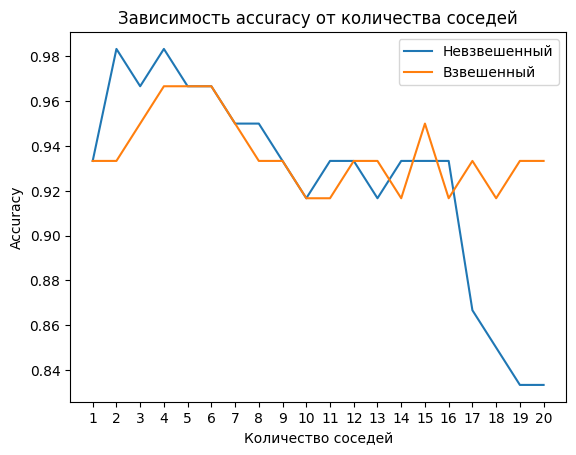

In [13]:
plt.title('Зависимость accuracy от количества соседей')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.xlabel('Количество соседей')
plt.plot(neighbors, accuracies_uniform, label='Невзвешенный')
plt.plot(neighbors, accuracies_distance, label='Взвешенный')
plt.legend()

In [14]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train['Class'].ravel())

y_train_pred = knn.predict(X_train).reshape(-1, 1)
y_test_pred = knn.predict(X_test).reshape(-1, 1)

<Axes: xlabel='X1', ylabel='X2'>

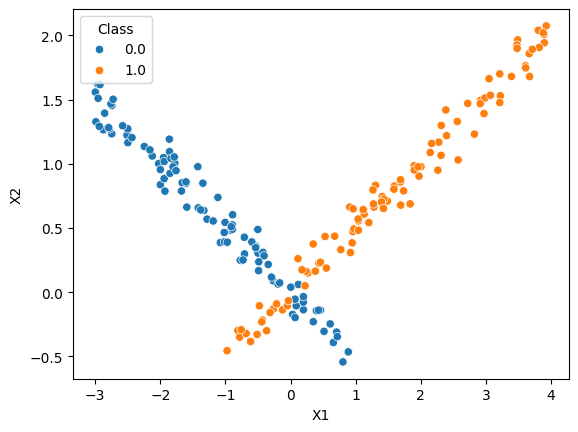

In [15]:
X_vis = np.row_stack([X_train, X_test])
y_vis = np.row_stack([y_train_pred, y_test_pred])
data_vis = pd.DataFrame(np.column_stack([X_vis, y_vis]),
                        columns=['X1', 'X2', 'Class'])
sns.scatterplot(data_vis, x='X1', y='X2', hue='Class')

### **2.2. Границы принятия решения**

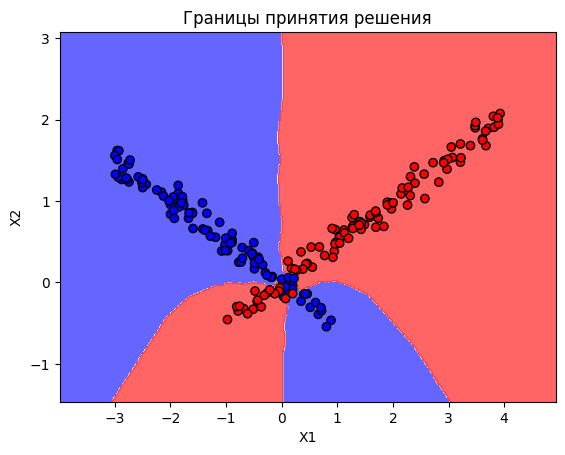

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
display = DecisionBoundaryDisplay.from_estimator(
    knn, X_train, response_method='predict',
    grid_resolution=400, alpha=0.7, cmap='bwr')
display.ax_.scatter(X['X1'], X['X2'], c=y['Class'], edgecolors = 'k', cmap='bwr')
display.ax_.set_title('Границы принятия решения')
plt.show()

### **2.3. Таблица ошибок**

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

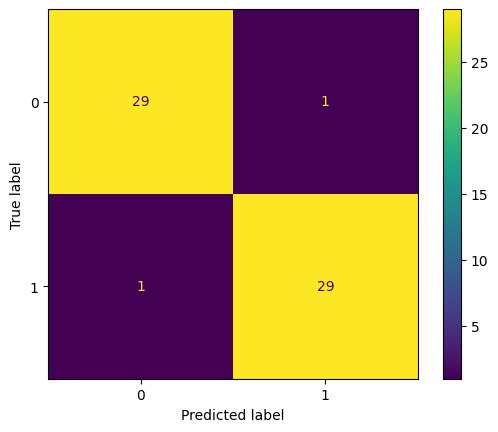

In [18]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()


### **2.4. Метрики**

In [19]:
print(confusion_matrix(y_test, y_test_pred))

print(accuracy_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred, average='macro'))
print(recall_score(y_test, y_test_pred, average='macro'))
print(f1_score(y_test, y_test_pred, average='macro'))


[[29  1]
 [ 1 29]]
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667


### **2.5. Roc-кривая**

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
print(roc_auc_score(y_test, y_test_pred))
fpr, tpr, f = roc_curve(y_test, y_test_pred)

0.9666666666666667


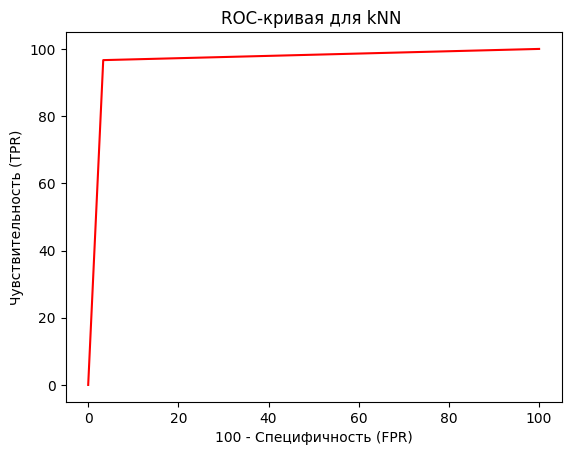

In [22]:
plt.title('ROC-кривая для kNN ')
plt.xlabel('100 - Специфичность (FPR)')
plt.ylabel('Чувствительность (TPR)')
plt.plot(fpr * 100, tpr * 100, 'r-')
plt.show()

## **3. Логистическая регрессия**

In [23]:
from sklearn.linear_model import LogisticRegression

### **3.1. Классификация**

In [24]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train['Class'].ravel())
y_test_pred = log_reg.predict(X_test)
log_reg_l1_accuracy = accuracy_score(y_test, y_test_pred)

log_reg = LogisticRegression(penalty='l2', solver='liblinear')
log_reg.fit(X_train, y_train['Class'].ravel())
y_test_pred = log_reg.predict(X_test)
log_reg_l2_accuracy = accuracy_score(y_test, y_test_pred)

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train['Class'].ravel())
y_test_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_test_pred)

<Axes: title={'center': 'Accuracy для логистической регрессии'}, ylabel='Accuracy'>

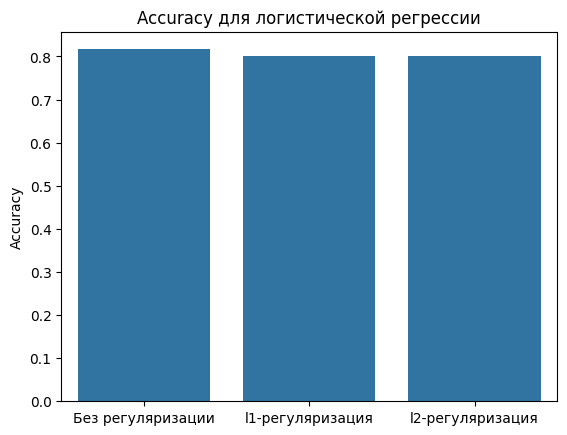

In [25]:
plt.title('Accuracy для логистической регрессии')
plt.ylabel('Accuracy')
sns.barplot(x=['Без регуляризации', 'l1-регуляризация', 'l2-регуляризация'],
            y=[log_reg_accuracy, log_reg_l1_accuracy, log_reg_l2_accuracy])

### **3.2. Границы принятия решения**

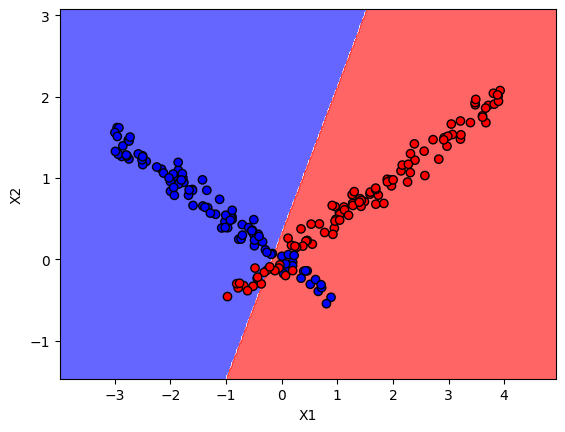

In [26]:
display = DecisionBoundaryDisplay.from_estimator(
    log_reg, X_train, response_method='predict',
    grid_resolution=400, alpha=0.7, cmap='bwr')
display.ax_.scatter(X['X1'], X['X2'], c=y['Class'], edgecolors = 'k', cmap='bwr')
plt.show()

### **3.3. Таблица ошибок**

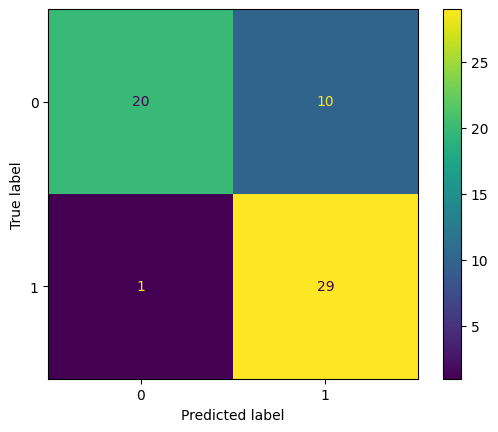

In [27]:
disp1 = ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

### **3.4. Метрики**

In [28]:
print(accuracy_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred))

0.8166666666666667
0.7435897435897436
0.9666666666666667
0.8405797101449275


### **3.5. Roc-кривая**

In [29]:
print(roc_auc_score(y_test, y_test_pred))
fpr, tpr, treshholds = roc_curve(y_test, y_test_pred)

0.8166666666666668


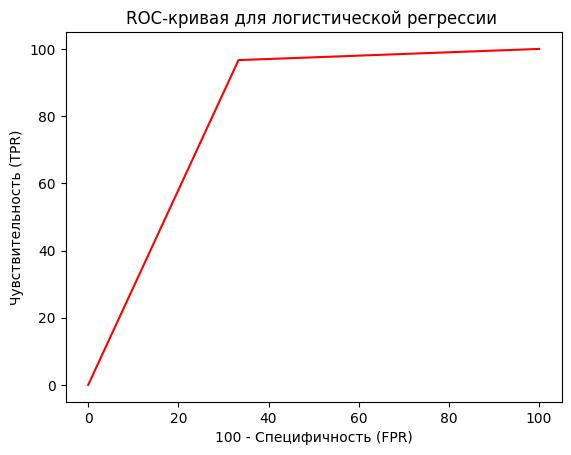

In [30]:
plt.title('ROC-кривая для логистической регрессии ')
plt.xlabel('100 - Специфичность (FPR)')
plt.ylabel('Чувствительность (TPR)')
plt.plot(fpr * 100, tpr * 100, 'r-')
plt.show()

## **4. Метод опорных векторов**

In [31]:
from sklearn.svm import SVC

### **4.1. Классификация**

0.9666666666666667


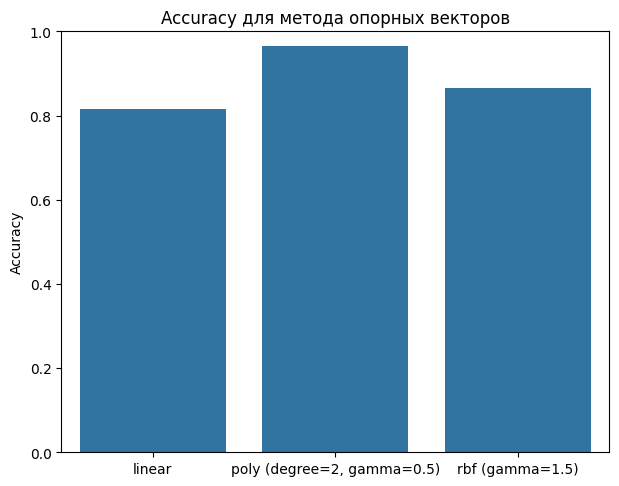

In [32]:
svcn = SVC(kernel = 'linear')
svcn.fit(X_train, y_train['Class'].ravel())
y_test_pred = svcn.predict(X_test)
svcn_lin_accuracy = accuracy_score(y_test, y_test_pred)

svcn = SVC(gamma=1.5)
svcn.fit(X_train, y_train['Class'].ravel())
y_test_pred = svcn.predict(X_test)
svcn_rbf_accuracy = accuracy_score(y_test, y_test_pred)


svcn = SVC(kernel = 'poly', degree=2, gamma=0.5)
svcn.fit(X_train, y_train['Class'].ravel())
y_test_pred = svcn.predict(X_test)
svcn_poly2_accuracy = accuracy_score(y_test, y_test_pred)



plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.title('Accuracy для метода опорных векторов')
sns.barplot(x=['linear', 'poly (degree=2, gamma=0.5)', 'rbf (gamma=1.5)'],
            y=[svcn_lin_accuracy, svcn_poly2_accuracy, svcn_rbf_accuracy])
print(svcn_poly2_accuracy)

### **4.2. Границы принятия решения**

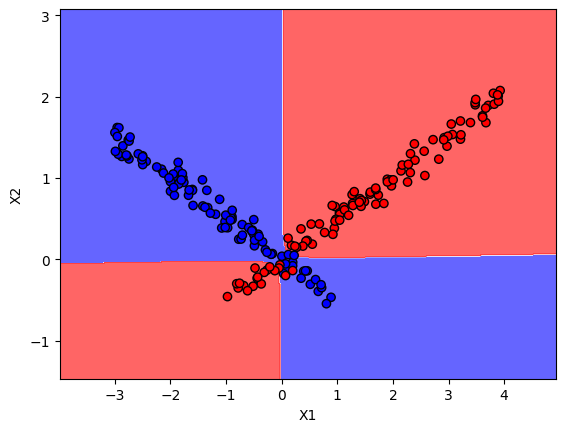

In [33]:
display = DecisionBoundaryDisplay.from_estimator(
    svcn, X_train, response_method='predict',
    grid_resolution=400, alpha=0.7, cmap='bwr')
display.ax_.scatter(X['X1'], X['X2'], c=y['Class'], edgecolors = 'k', cmap='bwr')
plt.show()

### **4.3. Таблица ошибок**

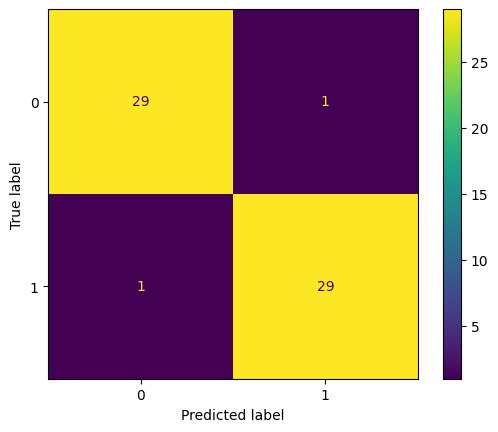

In [34]:
disp1 = ConfusionMatrixDisplay.from_estimator(svcn, X_test, y_test)
plt.show()

### **4.4. Метрики**

In [35]:
print(accuracy_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred, average='macro'))
print(recall_score(y_test, y_test_pred, average='macro'))
print(f1_score(y_test, y_test_pred, average='macro'))

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667


### **4.5. Roc-кривая**

In [36]:
print(roc_auc_score(y_test, y_test_pred))
fpr, tpr, treshholds = roc_curve(y_test, y_test_pred)

0.9666666666666667


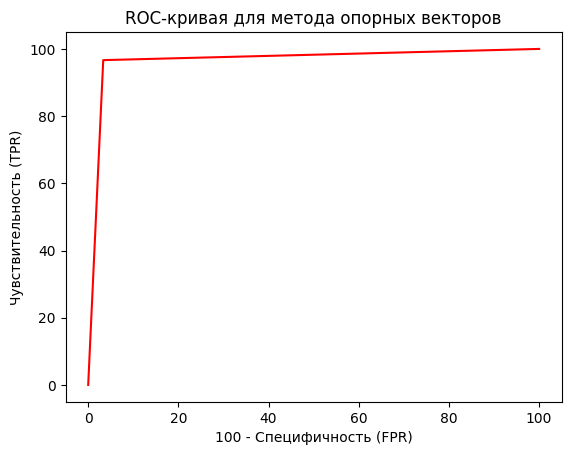

In [37]:
plt.title('ROC-кривая для метода опорных векторов')
plt.xlabel('100 - Специфичность (FPR)')
plt.ylabel('Чувствительность (TPR)')
plt.plot(fpr * 100, tpr * 100, 'r-')
plt.show()

## **5. Решающие деревья**

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

### **5.1. Классификация**

In [39]:
dtc = DecisionTreeClassifier(criterion='gini',
                             max_depth=3)
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9666666666666667


### **5.2. Границы принятия решения**

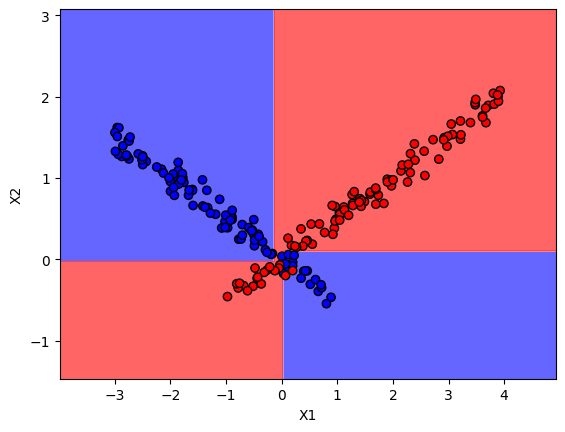

In [40]:
display = DecisionBoundaryDisplay.from_estimator(
    dtc, X_train, response_method='predict',
    grid_resolution=400, alpha=0.7, cmap='bwr')
display.ax_.scatter(X['X1'], X['X2'], c=y['Class'], edgecolors = 'k', cmap='bwr')
plt.show()

### **5.3. Таблица ошибок**

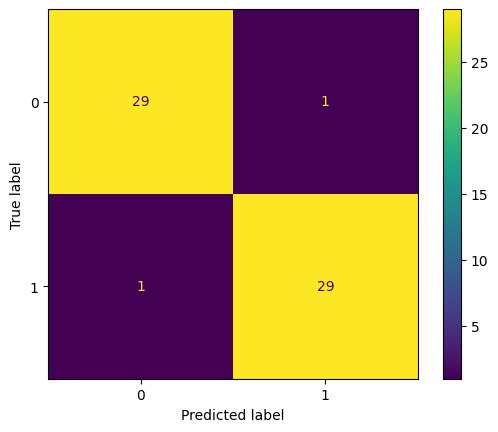

In [41]:
disp1 = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
plt.show()

### **5.4. Расчет метрик**

In [42]:
print(accuracy_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred, average='macro'))
print(recall_score(y_test, y_test_pred, average='macro'))
print(f1_score(y_test, y_test_pred, average='macro'))

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667


### **5.5. ROC-кривая**

In [43]:
print(roc_auc_score(y_test, y_test_pred))
fpr, tpr, treshholds = roc_curve(y_test, y_test_pred)

0.9666666666666667


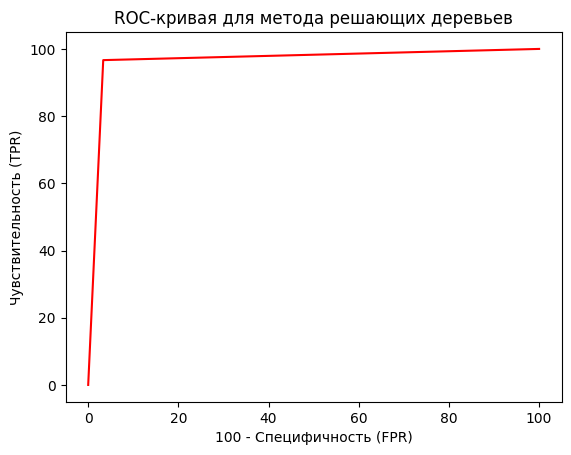

In [44]:
plt.title('ROC-кривая для метода решающих деревьев')
plt.xlabel('100 - Специфичность (FPR)')
plt.ylabel('Чувствительность (TPR)')
plt.plot(fpr * 100, tpr * 100, 'r-')
plt.show()

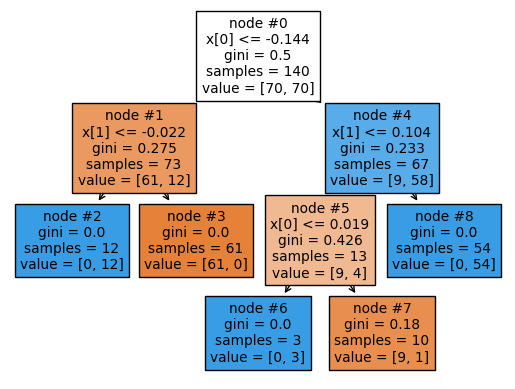

In [45]:
plt.title('Дерево решений')
plot_tree(dtc, filled=True, node_ids=True,)
plt.show()

In [46]:
print(accuracy_score(y_test, y_test_pred))

0.9666666666666667
